# Functions

In [70]:
def Kauffmann(x):
    return 0.61/(x-0.05)+1.3

def Kewley(x):
    return 0.61/(x-0.47)+1.19

def Stasinska(x):
    return (-30.787+1.1358*x+0.27297*x**2)*np.tanh(5.7409*x)-31.093

def Schawinski(x):
    return 1.05*x+0.45

def main_AGN_BPT2(x):
    return 0.73/(x+0.59)+1.33

def LINER_SY2_BPT2(x):
    return 1.18*x+1.30

def main_AGN_BPT3(x):
    return 0.72/(x-0.32)+1.30

def LINER_SY2_BPT3(x):
    return 1.89*x+0.76

# Plots parameters

In [2]:
params = {'font.size': 12,
          'figure.figsize': (8.,6.),
          'axes.labelsize': 18,
          'xtick.labelsize': 18,
          'ytick.labelsize': 18
         }

palette = ['#66c2a5', '#fc8d62', '#8da0cb']
palette_darker = ['#46af8e', '#fb6930', '#6a83bb']
palette2 = ['#a6611a', '#018571']

# Libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [4]:
plt.rcParams.update(params)

# Importing new data

In [5]:
data_raw = pd.read_csv('../../Data/GALEXFUV_to_SPIRE500_VACs2.csv')

In [6]:
data_raw

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,A_z,A_Y_UKIDSS,A_J_UKIDSS,A_H_UKIDSS,A_K_UKIDSS,A_Z_VIKING,A_Y_VIKING,A_J_VIKING,A_H_VIKING,A_K_VIKING
0,100000,100000,2.479260e-06,7.963562e-07,2.617298e-08,22.914194,6.236599,1.293492,1.753233,-,...,0.03305,0.02706,0.01986,0.01291,0.00804,0.03821,0.02927,0.02074,0.01323,0.00867
1,100001,100001,0.000000e+00,8.161955e-07,3.193431e-07,-999.000000,-999.000000,1.370058,1.820509,QI,...,0.03272,0.02679,0.01967,0.01279,0.00796,0.03783,0.02898,0.02053,0.01310,0.00858
2,100002,100002,1.556696e-06,1.300735e-06,5.138221e-09,23.419490,10.675610,1.142964,1.506265,-,...,0.03184,0.02607,0.01914,0.01244,0.00775,0.03681,0.02820,0.01998,0.01274,0.00835
3,100003,100003,5.865144e-06,8.889841e-07,1.193218e-07,21.979303,3.346163,1.260873,1.698566,-,...,0.03461,0.02834,0.02080,0.01352,0.00842,0.04001,0.03065,0.02171,0.01385,0.00908
4,100004,100004,1.493697e-05,6.755653e-07,1.844990e-07,20.964342,1.927995,1.418465,1.922459,-,...,0.03323,0.02721,0.01998,0.01299,0.00809,0.03842,0.02944,0.02085,0.01330,0.00872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119463,3021558,3021558,2.274809e-07,5.091504e-07,2.018976e-08,25.507637,41.344063,1.246210,1.692332,Q,...,0.04419,0.03618,0.02656,0.01727,0.01076,0.05109,0.03914,0.02773,0.01769,0.01159
119464,3021559,3021559,0.000000e+00,5.629622e-07,2.982534e-08,-999.000000,-999.000000,1.425687,1.873708,QI,...,0.03202,0.02622,0.01925,0.01252,0.00779,0.03703,0.02836,0.02009,0.01282,0.00840
119465,302156,302156,1.878590e-06,5.459135e-07,5.455340e-07,23.215420,5.081846,1.292771,1.752383,-,...,0.03004,0.02459,0.01806,0.01174,0.00731,0.03473,0.02661,0.01885,0.01202,0.00788
119466,3021560,3021560,0.000000e+00,4.806578e-07,1.257188e-07,-999.000000,-999.000000,1.372953,1.813215,QI,...,0.03693,0.03024,0.02220,0.01443,0.00899,0.04270,0.03271,0.02317,0.01478,0.00969


In [7]:
for i in data_raw.keys():
    print(i)

LAMID
CATAID
DFAflux_GALEXFUV
DFAErr_GALEXFUV
DeblendErr_GALEXFUV
ABMagDFA_GALEXFUV
ABMagErrDFA_GALEXFUV
MinApCorr_GALEXFUV
MaxApCorr_GALEXFUV
PhotometryWarning_GALEXFUV
PhotometryFlag_GALEXFUV
DFAflux_GALEXNUV
DFAErr_GALEXNUV
DeblendErr_GALEXNUV
ABMagDFA_GALEXNUV
ABMagErrDFA_GALEXNUV
MinApCorr_GALEXNUV
MaxApCorr_GALEXNUV
PhotometryWarning_GALEXNUV
PhotometryFlag_GALEXNUV
DFAflux_SDSSu
DFAErr_SDSSu
DeblendErr_SDSSu
ABMagDFA_SDSSu
ABMagErrDFA_SDSSu
MinApCorr_SDSSu
MaxApCorr_SDSSu
PhotometryWarning_SDSSu
PhotometryFlag_SDSSu
DFAflux_SDSSg
DFAErr_SDSSg
DeblendErr_SDSSg
ABMagDFA_SDSSg
ABMagErrDFA_SDSSg
MinApCorr_SDSSg
MaxApCorr_SDSSg
PhotometryWarning_SDSSg
PhotometryFlag_SDSSg
DFAflux_SDSSr
DFAErr_SDSSr
DeblendErr_SDSSr
ABMagDFA_SDSSr
ABMagErrDFA_SDSSr
MinApCorr_SDSSr
MaxApCorr_SDSSr
PhotometryWarning_SDSSr
PhotometryFlag_SDSSr
DFAflux_SDSSi
DFAErr_SDSSi
DeblendErr_SDSSi
ABMagDFA_SDSSi
ABMagErrDFA_SDSSi
MinApCorr_SDSSi
MaxApCorr_SDSSi
PhotometryWarning_SDSSi
PhotometryFlag_SDSSi
DFAflux_S

# Data subsets

In [59]:
# BPT diagrams
data_BPT1 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([OI] 6300/Halpha)
data_BPT2 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['OIB_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# log([OIII 5007]/Hbeta) x log([SII] 6716+6731/Halpha)
data_BPT3 = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['HB_FLUX']>0) &
                     (data_raw['SIIB_FLUX']>0) & 
                     (data_raw['SIIR_FLUX']>0) &
                     (data_raw['OIIIR_FLUX']>0)]

# WHAN diagrams
data_WHAN = data_raw[(data_raw['HA_FLUX']>0) &
                     (data_raw['NIIR_FLUX']>0) &
                     (data_raw['HA_EW']>0)]

# Diagrams for new data

# BPT diagram

In [9]:
x1 = data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']
y1 = data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']

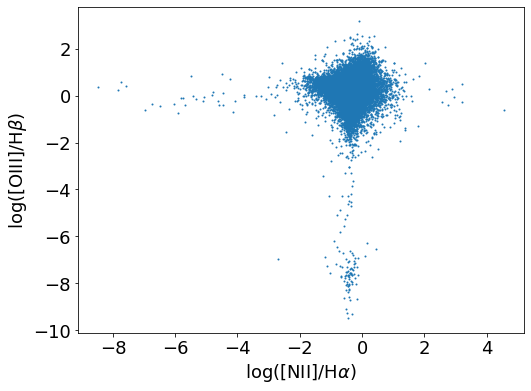

In [10]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.show()

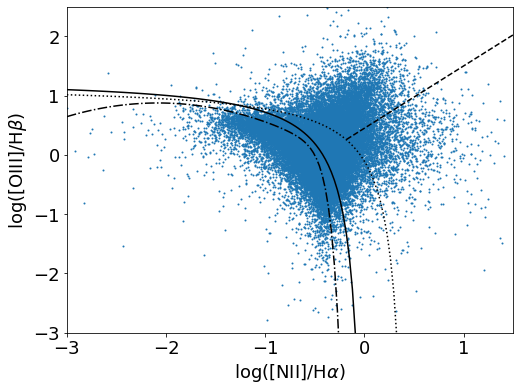

In [90]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-3,2.5)
plt.show()

In [62]:
# log([OIII 5007]/Hbeta) x log([OI] 6300/Halpha)
x2 = data_BPT2['OIB_FLUX']/data_BPT2['HA_FLUX']
y2 = data_BPT2['OIIIR_FLUX']/data_BPT2['HB_FLUX']

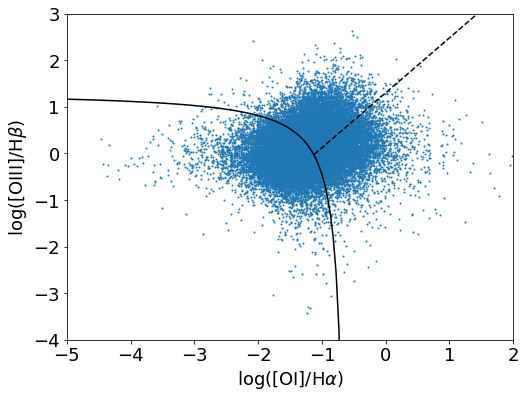

In [91]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)

x0 = np.linspace(-5, -0.6, 100)
plt.plot(x0, main_AGN_BPT2(x0), c='k')

x0 = np.linspace(-1.12, 2, 100)
plt.plot(x0, LINER_SY2_BPT2(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{OI}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-5,2)
plt.ylim(-4,3)
plt.show()

In [65]:
# log([OIII 5007]/Hbeta) x log([SII] 6716+6731/Halpha)
x3 = (data_BPT3['SIIR_FLUX']+data_BPT3['SIIB_FLUX'])/data_BPT3['HA_FLUX']
y3 = data_BPT3['OIIIR_FLUX']/data_BPT3['HB_FLUX']

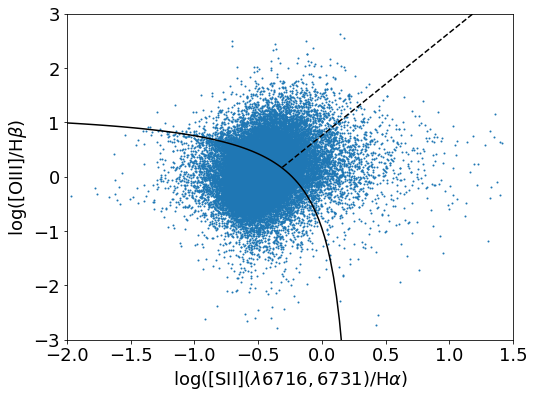

In [92]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)

x0 = np.linspace(-2, 0.3, 100)
plt.plot(x0, main_AGN_BPT3(x0), c='k')

x0 = np.linspace(-0.31, 1.5, 100)
plt.plot(x0, LINER_SY2_BPT3(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{SII}](\lambda 6716,6731)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-2,1.5)
plt.ylim(-3,3)
plt.show()

# WHAN diagram

In [12]:
x4 = data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']
y4 = data_WHAN['HA_EW']

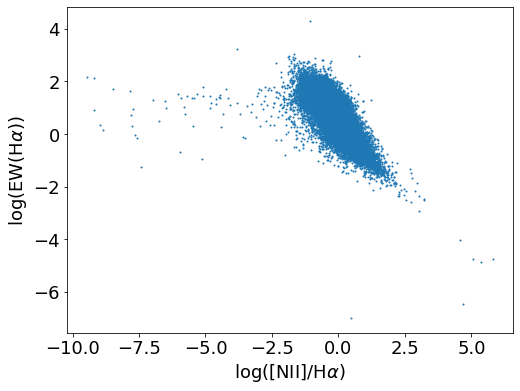

In [13]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.show()

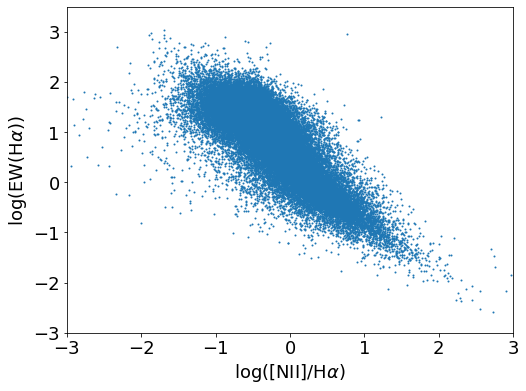

In [58]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,3)
plt.ylim(-3,3.5)
plt.show()

# Classification

In [15]:
# WHAN classification
SF = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) < -0.4) & (data_WHAN['HA_EW'] > 3)]
sAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 6)]
wAGN = data_WHAN[(np.log10(data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']) > -0.4) & (data_WHAN['HA_EW'] > 3) 
                 & (data_WHAN['HA_EW'] < 6)]

retired_and_passive = data_WHAN[(data_WHAN['HA_EW'] < 3)]
passive = data_WHAN[(data_WHAN['HA_EW'] < 0.5) & (data_WHAN['NIIR_EW'] < 0.5)]
retired = data_WHAN[((data_WHAN['HA_EW'] < 3) & (data_WHAN['NIIR_EW'] > 0.5)) | 
                    (data_WHAN['HA_EW'] < 3) & (data_WHAN['HA_EW'] > 0.5)]

orange_dots = data_WHAN[(data_WHAN['HA_EW'] < 0.5) | (data_WHAN['NIIR_EW'] < 0.5)]
unclassified = data_raw[(data_raw['HA_FLUX']<=0) |
                (data_raw['NIIR_FLUX']<=0) |
                (data_raw['HA_EW']<=0)]

print('WHAN classification')
print('Star forming:', len(SF))
print('Strong AGN:', len(sAGN))
print('Weak AGN:', len(wAGN))
print('Retired:', len(retired))
print('Passive:', len(passive))
print('Unclassified:', len(data_raw)-len(data_WHAN), " should be equal to ", len(unclassified))

WHAN classification
Star forming: 34209
Strong AGN: 22360
Weak AGN: 6115
Retired: 14435
Passive: 551
Unclassified: 41798  should be equal to  41798


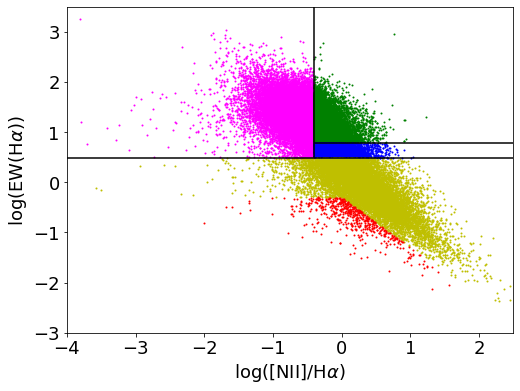

In [16]:
plt.plot(np.log10(SF['NIIR_FLUX']/SF['HA_FLUX']), np.log10(SF['HA_EW']), ls='', marker='o', markersize=1, 
         c='magenta')
plt.plot(np.log10(sAGN['NIIR_FLUX']/sAGN['HA_FLUX']), np.log10(sAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='g')
plt.plot(np.log10(wAGN['NIIR_FLUX']/wAGN['HA_FLUX']), np.log10(wAGN['HA_EW']), ls='', marker='o', markersize=1, 
         c='b')
plt.plot(np.log10(retired['NIIR_FLUX']/retired['HA_FLUX']), np.log10(retired['HA_EW']), ls='', marker='o', 
         markersize=1, c='y')
plt.plot(np.log10(passive['NIIR_FLUX']/passive['HA_FLUX']), np.log10(passive['HA_EW']), ls='', marker='o', 
         markersize=1, c='red')
#plt.plot(np.log10(orange_dots['NIIR_FLUX']/orange_dots['HA_FLUX']), np.log10(orange_dots['HA_EW']), ls='', 
#         marker='o', markersize=1, c='orange', alpha=0.2)

plt.axhline(np.log10(3), c='k')
plt.axhline(np.log10(6), xmin=0.555, xmax=1, c='k')
plt.axvline(-0.4, ymin=0.54, c='k')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-4,2.5)
plt.ylim(-3,3.5)
plt.show()

In [17]:
SF_class = {}
SF_class['CATAID'] = SF['CATAID'].values
SF_class['WHAN classification'] = 'SF'

SF_class_df = pd.DataFrame(SF_class)


sAGN_class = {}
sAGN_class['CATAID'] = sAGN['CATAID'].values
sAGN_class['WHAN classification'] = 'sAGN'

sAGN_class_df = pd.DataFrame(sAGN_class)


wAGN_class = {}
wAGN_class['CATAID'] = wAGN['CATAID'].values
wAGN_class['WHAN classification'] = 'wAGN'

wAGN_class_df = pd.DataFrame(wAGN_class)


retired_class = {}
retired_class['CATAID'] = retired['CATAID'].values
retired_class['WHAN classification'] = 'retired'

retired_class_df = pd.DataFrame(retired_class)


passive_class = {}
passive_class['CATAID'] = passive['CATAID'].values
passive_class['WHAN classification'] = 'passive'

passive_class_df = pd.DataFrame(passive_class)


unclassified_class = {}
unclassified_class['CATAID'] = unclassified['CATAID'].values
unclassified_class['WHAN classification'] = 'unclassified'

unclassified_class_df = pd.DataFrame(unclassified_class)


classification = pd.concat([SF_class_df, sAGN_class_df, wAGN_class_df, retired_class_df, passive_class_df, unclassified_class_df])
classification_sorted = classification.sort_values(by=['CATAID'])
classification_sorted

,CATAID,WHAN classification
3690,14283,sAGN
6791,14295,unclassified
5901,14296,SF
1048,14300,wAGN
6810,14301,unclassified
...,...,...
6114,3021557,wAGN
41794,3021558,unclassified
41795,3021559,unclassified
41797,3021560,unclassified


In [18]:
data_raw.sort_values(by=['CATAID'])

,LAMID,CATAID,DFAflux_GALEXFUV,DFAErr_GALEXFUV,DeblendErr_GALEXFUV,ABMagDFA_GALEXFUV,ABMagErrDFA_GALEXFUV,MinApCorr_GALEXFUV,MaxApCorr_GALEXFUV,PhotometryWarning_GALEXFUV,...,A_z,A_Y_UKIDSS,A_J_UKIDSS,A_H_UKIDSS,A_K_UKIDSS,A_Z_VIKING,A_Y_VIKING,A_J_VIKING,A_H_VIKING,A_K_VIKING
20012,14283,14283,4.959161e-06,5.106872e-07,5.621592e-08,22.161480,2.293512,1.303803,1.763267,-,...,0.05427,0.04444,0.03262,0.02121,0.01321,0.06275,0.04807,0.03405,0.02172,0.01424
20046,14295,14295,1.519702e-06,4.664399e-07,2.227008e-08,23.445604,5.061303,1.405684,1.867317,-,...,0.05059,0.04142,0.03041,0.01977,0.01231,0.05849,0.04481,0.03174,0.02025,0.01327
20057,14296,14296,2.564276e-06,4.848378e-07,1.941860e-08,22.877588,3.581608,1.300967,1.762854,-,...,0.05463,0.04473,0.03284,0.02135,0.01330,0.06317,0.04839,0.03428,0.02187,0.01433
20098,14300,14300,9.047083e-06,2.620990e-07,7.489817e-08,21.508728,1.828757,1.642948,2.071824,-,...,0.04755,0.03893,0.02858,0.01858,0.01157,0.05498,0.04212,0.02984,0.01903,0.01247
20109,14301,14301,3.783180e-06,4.420882e-07,3.998670e-08,22.455359,2.841986,1.286663,1.739219,-,...,0.04519,0.03700,0.02716,0.01766,0.01100,0.05225,0.04002,0.02835,0.01809,0.01185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119462,3021557,3021557,1.004720e-05,6.551995e-07,8.515830e-08,21.394888,2.559505,1.242331,1.686790,-,...,0.04802,0.03932,0.02887,0.01877,0.01169,0.05552,0.04253,0.03013,0.01922,0.01260
119463,3021558,3021558,2.274809e-07,5.091504e-07,2.018976e-08,25.507637,41.344063,1.246210,1.692332,Q,...,0.04419,0.03618,0.02656,0.01727,0.01076,0.05109,0.03914,0.02773,0.01769,0.01159
119464,3021559,3021559,0.000000e+00,5.629622e-07,2.982534e-08,-999.000000,-999.000000,1.425687,1.873708,QI,...,0.03202,0.02622,0.01925,0.01252,0.00779,0.03703,0.02836,0.02009,0.01282,0.00840
119466,3021560,3021560,0.000000e+00,4.806578e-07,1.257188e-07,-999.000000,-999.000000,1.372953,1.813215,QI,...,0.03693,0.03024,0.02220,0.01443,0.00899,0.04270,0.03271,0.02317,0.01478,0.00969


In [19]:
# BPT classification
sf = data_BPT[(np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Stasinska(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
              (np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) < 10)]
seyfert = data_BPT[((np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                    (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX'])))) | 
                   ((np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) >= 0.4) & 
                    (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))))]
liners = data_BPT[((np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                   (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX'])))) | 
                  ((np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) >= 0.4) & 
                   (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Schawinski(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))))]
composite = data_BPT[(np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) > Stasinska(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                     (np.log10(data_BPT['OIIIR_FLUX']/data_BPT['HB_FLUX']) < Kewley(np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']))) & 
                     (np.log10(data_BPT['NIIR_FLUX']/data_BPT['HA_FLUX']) < 0.4)]
unclassified_bpt = data_raw[(data_raw['HA_FLUX']<=0) | 
                            (data_raw['HB_FLUX']<=0) |
                            (data_raw['NIIR_FLUX']<=0) |
                            (data_raw['OIIIR_FLUX']<=0)]

print('BPT classification')
print('Star forming:', len(sf))
print('Seyfert:', len(seyfert))
print('LINERs:', len(liners))
print('Composite:', len(composite))
print('Unclassified:', len(data_raw)-len(data_BPT), " should be equal to ", len(unclassified_bpt))

BPT classification
Star forming: 19324
Seyfert: 7269
LINERs: 2383
Composite: 26350
Unclassified: 64142  should be equal to  64142


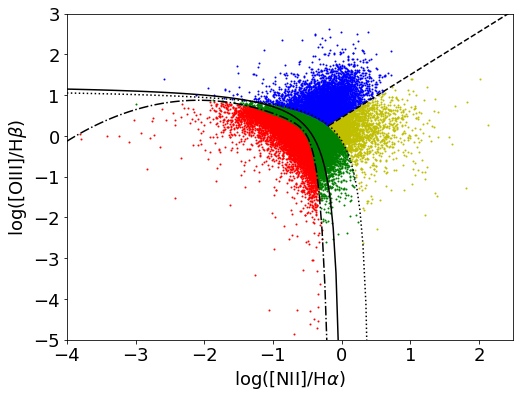

In [20]:
plt.plot(np.log10(sf['NIIR_FLUX']/sf['HA_FLUX']), 
         np.log10(sf['OIIIR_FLUX']/sf['HB_FLUX']), ls='', marker='o', markersize=1, c='r')
plt.plot(np.log10(composite['NIIR_FLUX']/composite['HA_FLUX']), 
         np.log10(composite['OIIIR_FLUX']/composite['HB_FLUX']), ls='', marker='o', markersize=1, c='g')
plt.plot(np.log10(seyfert['NIIR_FLUX']/seyfert['HA_FLUX']), 
         np.log10(seyfert['OIIIR_FLUX']/seyfert['HB_FLUX']), ls='', marker='o', markersize=1, c='b')
plt.plot(np.log10(liners['NIIR_FLUX']/liners['HA_FLUX']), 
         np.log10(liners['OIIIR_FLUX']/liners['HB_FLUX']), ls='', marker='o', markersize=1, c='y')

xx1 = np.linspace(-4, 0.4, 100)
xx2 = np.linspace(-4, 0, 100)
xx3 = np.linspace(-4, 0, 100)
xx4 = np.linspace(-0.18, 2.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}]/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}]/\mathrm{H}\beta)$')
plt.xlim(-4,2.5)
plt.ylim(-5,3)
plt.show()

In [21]:
sf_class = {}
sf_class['CATAID'] = sf['CATAID'].values
sf_class['BPT classification'] = 'SF'

sf_class_df = pd.DataFrame(sf_class)


seyfert_class = {}
seyfert_class['CATAID'] = seyfert['CATAID'].values
seyfert_class['BPT classification'] = 'seyfert'

seyfert_class_df = pd.DataFrame(seyfert_class)


liners_class = {}
liners_class['CATAID'] = liners['CATAID'].values
liners_class['BPT classification'] = 'LINERs'

liners_class_df = pd.DataFrame(liners_class)


composite_class = {}
composite_class['CATAID'] = composite['CATAID'].values
composite_class['BPT classification'] = 'composite'

composite_class_df = pd.DataFrame(composite_class)


unclassified_bpt_class = {}
unclassified_bpt_class['CATAID'] = unclassified_bpt['CATAID'].values
unclassified_bpt_class['BPT classification'] = 'unclassified'

unclassified_bpt_class_df = pd.DataFrame(unclassified_bpt_class)


classification_bpt = pd.concat([sf_class_df, seyfert_class_df, liners_class_df, composite_class_df, unclassified_bpt_class_df])
classification_bpt_sorted = classification_bpt.sort_values(by=['CATAID'])
classification_bpt_sorted

,CATAID,BPT classification
4387,14283,composite
10740,14295,unclassified
3222,14296,SF
10763,14300,unclassified
10770,14301,unclassified
...,...,...
26349,3021557,composite
64137,3021558,unclassified
64138,3021559,unclassified
64140,3021560,unclassified


In [22]:
final_classification = pd.merge(classification_sorted, classification_bpt_sorted, on='CATAID')
final_classification.to_csv('classified_dataset.csv')

# More subsets

In [53]:
retired_NIIR_OIIR = retired[(retired['NIIR_FLUX'] > 0) & (retired['OIIR_FLUX'] > 0)]
passive_NIIR_OIIR = passive[(passive['NIIR_FLUX'] > 0) & (passive['OIIR_FLUX'] > 0)]
unclassified_NIIR_OIIR = unclassified[(unclassified['NIIR_FLUX'] > 0) & (unclassified['OIIR_FLUX'] > 0)]

# Spectra

In [23]:
l_pivot = [1535, 2301, 3557, 4702, 6175, 7491, 8946, 8800, 10213, 12525, 16433, 21503, 
           3.37*10**4, 4.62*10**4, 12.1*10**4, 22.8*10**4, 101*10**4, 161*10**4, 249*10**4, 357*10**4, 504*10**4]
flux = [max(data_raw['DFAflux_GALEXFUV']), max(data_raw['DFAflux_GALEXNUV']), max(data_raw['DFAflux_SDSSu']), 
        max(data_raw['DFAflux_SDSSg']), max(data_raw['DFAflux_SDSSr']), max(data_raw['DFAflux_SDSSi']), 
        max(data_raw['DFAflux_SDSSz']), max(data_raw['DFAflux_VIKINGZ']), max(data_raw['DFAflux_VIKINGY']), 
        max(data_raw['DFAflux_VIKINGJ']), max(data_raw['DFAflux_VIKINGH']), max(data_raw['DFAflux_VIKINGK']), 
        max(data_raw['DFAflux_WISEW1']), max(data_raw['DFAflux_WISEW2']), max(data_raw['DFAflux_WISEW3']), 
        max(data_raw['DFAflux_WISEW4']), max(data_raw['DFAflux_PACS100']), max(data_raw['DFAflux_PACS160']), 
        max(data_raw['DFAflux_SPIRE250']), max(data_raw['DFAflux_SPIRE350']), max(data_raw['DFAflux_SPIRE500'])]

Text(0, 0.5, '$\\log(F)$ (Jy)')

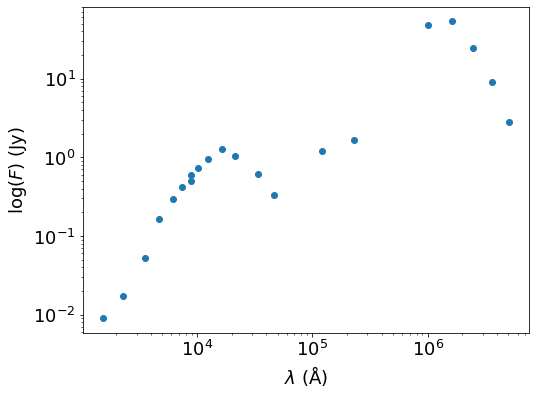

In [24]:
plt.scatter(l_pivot, flux)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ ($\mathrm{\AA}$)')
plt.ylabel(r'$\log(F)$ (Jy)')

# Plots

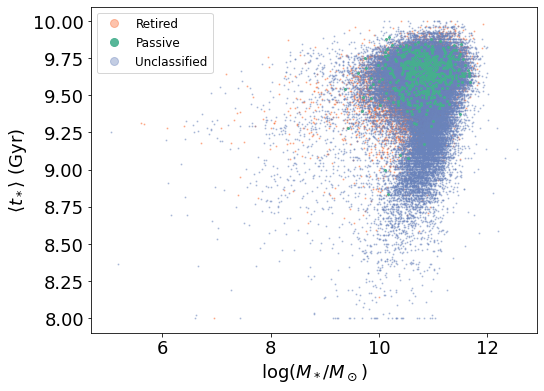

In [27]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ager_percentile50'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ager_percentile50'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ager_percentile50'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


(array([1442., 1444., 1443., 1441., 1447., 1444., 1445., 1443., 1444.,
        1442.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

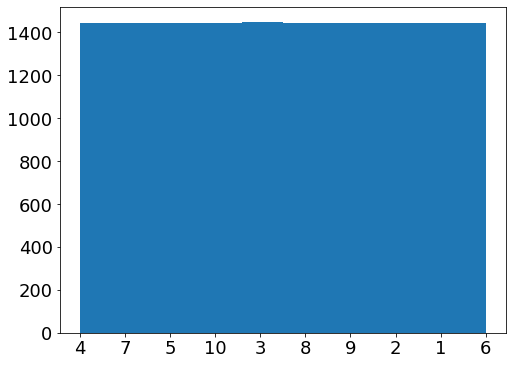

In [28]:
retired['age_new'] = pd.qcut(np.log10(retired['mass_stellar_best_fit']), q=10, labels=['1', '2', '3', '4', '5',
                                                                                       '6', '7', '8', '9', '10'])
plt.hist(retired['age_new'])

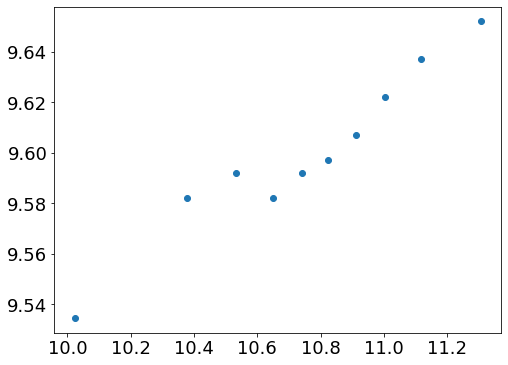

In [29]:
x = np.zeros(10)
y = np.zeros(10)

one = retired[retired['age_new'] == '1']
x[0] = np.log10(one['mass_stellar_best_fit'].median())
y[0] = one['ager_percentile50'].median()

two = retired[retired['age_new'] == '2']
x[1] = np.log10(two['mass_stellar_best_fit'].median())
y[1] = two['ager_percentile50'].median()

three = retired[retired['age_new'] == '3']
x[2] = np.log10(three['mass_stellar_best_fit'].median())
y[2] = three['ager_percentile50'].median()

four = retired[retired['age_new'] == '4']
x[3] = np.log10(four['mass_stellar_best_fit'].median())
y[3] = four['ager_percentile50'].median()

five = retired[retired['age_new'] == '5']
x[4] = np.log10(five['mass_stellar_best_fit'].median())
y[4] = five['ager_percentile50'].median()

six = retired[retired['age_new'] == '6']
x[5] = np.log10(six['mass_stellar_best_fit'].median())
y[5] = six['ager_percentile50'].median()

seven = retired[retired['age_new'] == '7']
x[6] = np.log10(seven['mass_stellar_best_fit'].median())
y[6] = seven['ager_percentile50'].median()

eight = retired[retired['age_new'] == '8']
x[7] = np.log10(eight['mass_stellar_best_fit'].median())
y[7] = eight['ager_percentile50'].median()

nine = retired[retired['age_new'] == '9']
x[8] = np.log10(nine['mass_stellar_best_fit'].median())
y[8] = nine['ager_percentile50'].median()

ten = retired[retired['age_new'] == '10']
x[9] = np.log10(ten['mass_stellar_best_fit'].median())
y[9] = ten['ager_percentile50'].median()

plt.scatter(x,y)

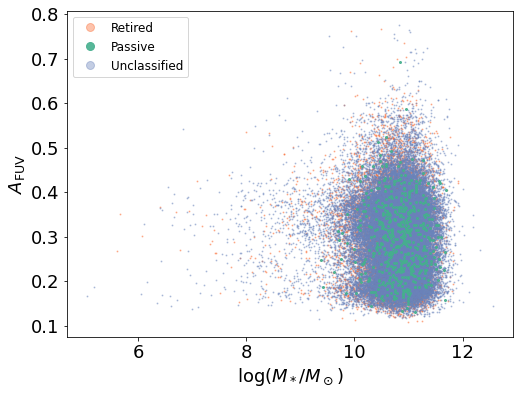

In [31]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_FUV'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_FUV'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_FUV'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

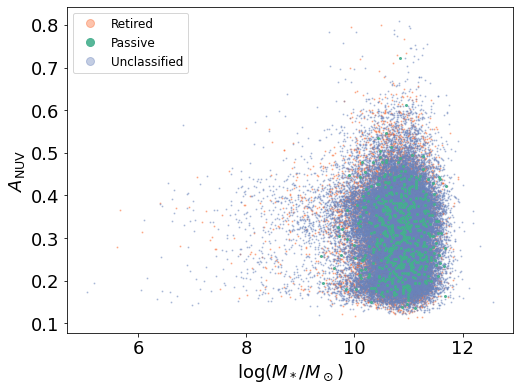

In [32]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_NUV'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_NUV'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_NUV'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

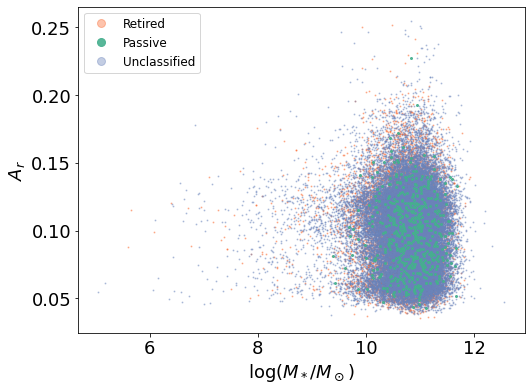

In [34]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_r'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_r'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_r'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{r}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

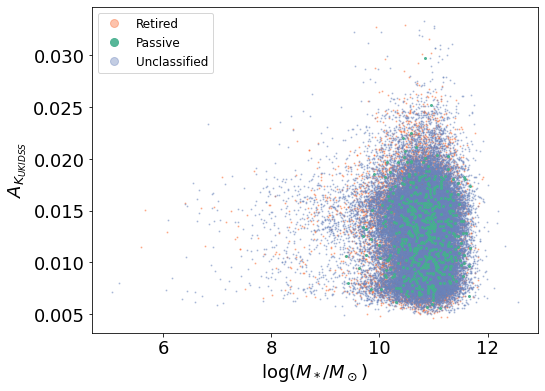

In [36]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_UKIDSS'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_UKIDSS'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_UKIDSS'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{UKIDSS}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

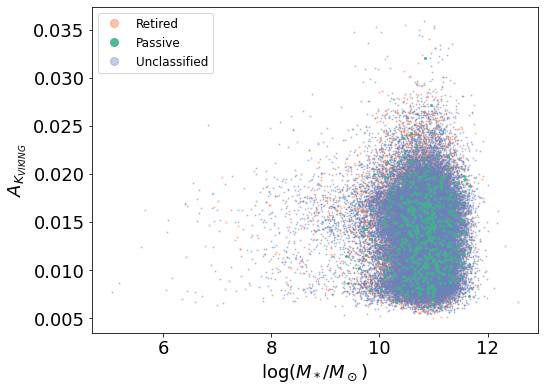

In [37]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_VIKING'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_VIKING'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_VIKING'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

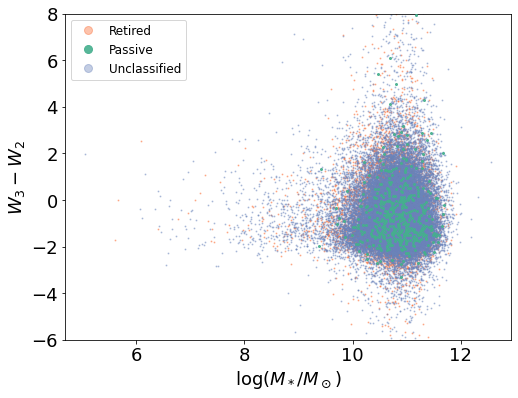

In [41]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ABMagDFA_WISEW3']-retired['ABMagDFA_WISEW2'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ABMagDFA_WISEW3']-passive['ABMagDFA_WISEW2'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ABMagDFA_WISEW3']-unclassified['ABMagDFA_WISEW2'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(-6,8)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

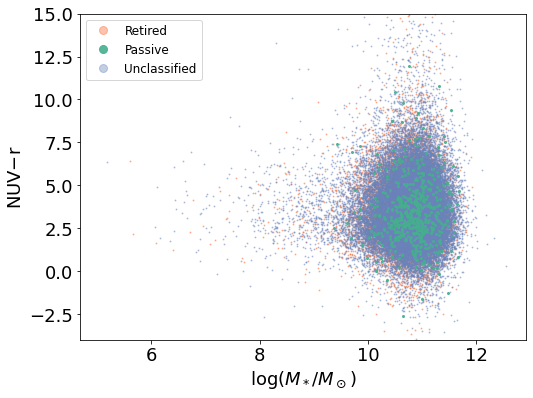

In [44]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ABMagDFA_GALEXNUV']-retired['ABMagDFA_SDSSr'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ABMagDFA_GALEXNUV']-passive['ABMagDFA_SDSSr'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ABMagDFA_GALEXNUV']-unclassified['ABMagDFA_SDSSr'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(-4,15)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

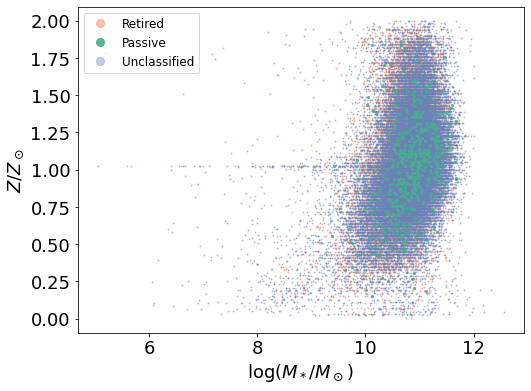

In [45]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['metalicity_Z_Zo_percentile50'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

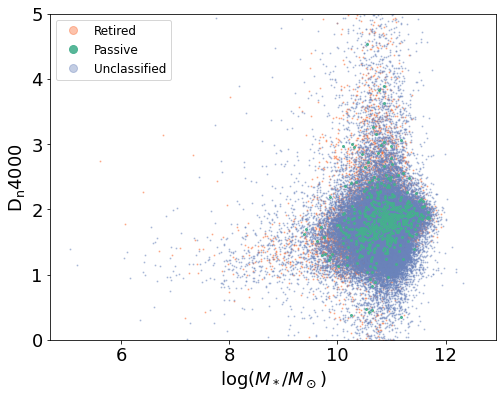

In [50]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['D4000N'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['D4000N'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['D4000N'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(0, 5)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

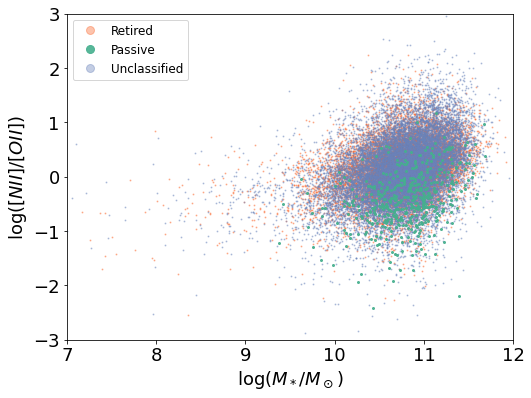

In [57]:
plt.plot(np.log10(retired_NIIR_OIIR['mass_stellar_best_fit']), np.log10(retired_NIIR_OIIR['NIIR_FLUX']/retired_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive_NIIR_OIIR['mass_stellar_best_fit']), np.log10(passive_NIIR_OIIR['NIIR_FLUX']/passive_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified_NIIR_OIIR['mass_stellar_best_fit']), np.log10(unclassified_NIIR_OIIR['NIIR_FLUX']/unclassified_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

plt.xlim(7, 12)
plt.ylim(-3,3)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log([NII]/[OII])$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

# Histograms/kdeplots

Text(0.5, 0, '$\\log([OIII](\\lambda 5007)/[NII](\\lambda 6583))$')

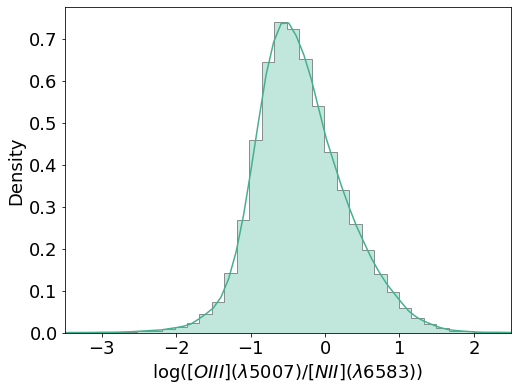

In [108]:
OIIIR_NIIR_data = data_raw[(data_raw['OIIIR_FLUX'] > 0) & (data_raw['NIIR_FLUX'] > 0)]

x = OIIIR_NIIR_data['OIIIR_FLUX']/OIIIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OII](\\lambda 3726)/[NII](\\lambda 6583))$')

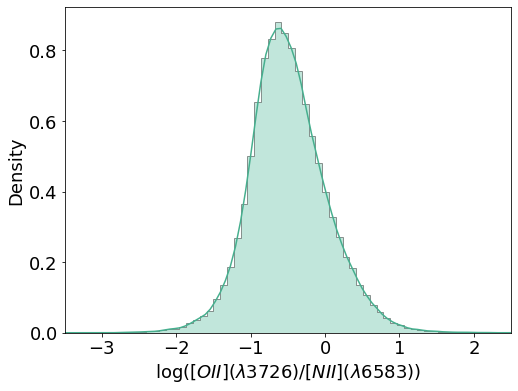

In [109]:
OIIB_NIIR_data = data_raw[(data_raw['OIIB_FLUX'] > 0) & (data_raw['NIIR_FLUX'] > 0)]

x = OIIB_NIIR_data['OIIB_FLUX']/OIIB_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[NII](\lambda 6583))$')